---
---
# Regressão Linear Múltipla - Advertising Dataset

Este notebook mostra o uso do algoritmo [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): algoritmo de Regressão Linear disponível na biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) para realizar a tarefa de regressão com o conjunto de dados [**Advertising**](https://www.kaggle.com/ashydv/advertising-dataset).

---
---
##Advertising Dataset

O conjunto de dados Advertising é comumente utilizado para a tarefa de Regressão Linear. O objetivo é prever o volume de vendas com base nos investimentos de publicidade em TV, Rádio e Jornais.

* 200 exemplos
* Variável dependente: "Sales"
* Variáveis independentes: "TV, "Rádio" e "Newspaper"


---



---



### Leitura dos dados



In [1]:
import pandas as pd

# Clone do repositório de dados do GitHub
!git clone https://github.com/malegopc/DSBD

dataset = pd.read_csv("/content/DSBD/Datasets/Advertising/Advertising.csv")
dataset

fatal: destination path 'DSBD' already exists and is not an empty directory.


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Separa variáveis independentes e dependente

In [2]:
x = dataset[['TV','radio','newspaper']]
y = dataset['sales']           

In [3]:
x.shape

(200, 3)

In [4]:
y.shape

(200,)

### Gráficos de dispersão usando o Seaborn

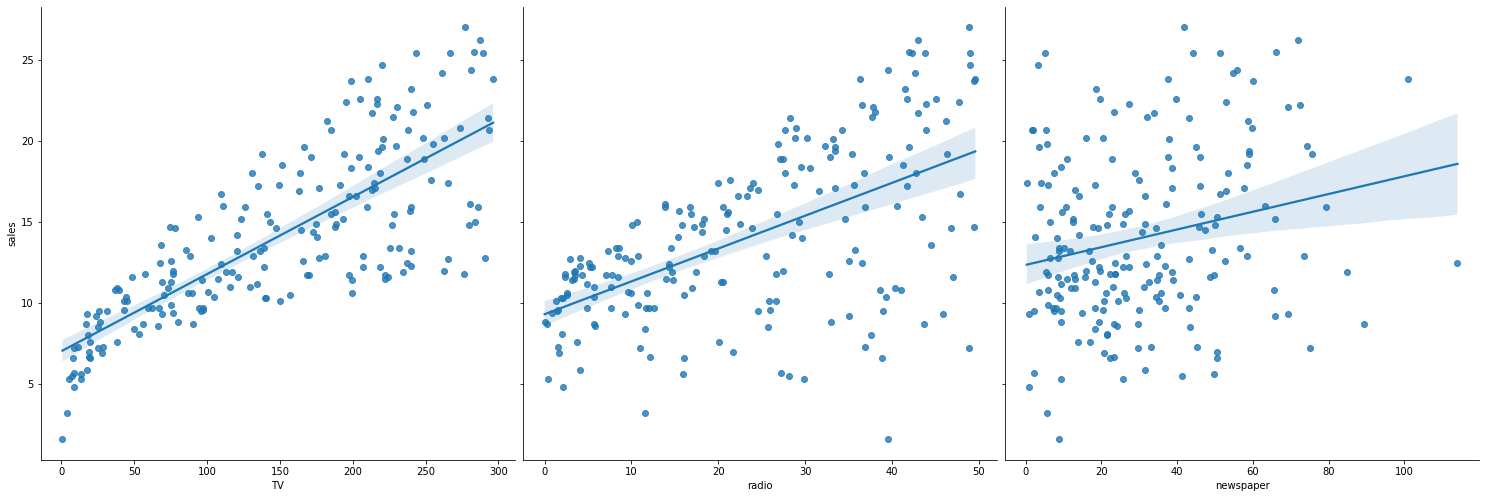

In [5]:
import seaborn as sns
sns.pairplot(dataset, x_vars=['TV','radio','newspaper'], y_vars='sales',height=7, kind='reg')

### Calculando o coeficiente de correlação de Pearson e valor-p


In [6]:
from scipy import stats
print("Coeficiente de Pearson entre TV e Sales",round(stats.pearsonr(x['TV'],y)[0],4))
print("Valor-p",stats.pearsonr(x['TV'],y)[1]) 
print("Coeficiente de Pearson entre Radio e Sales",round(stats.pearsonr(x['radio'],y)[0],4))
print("Valor-p",stats.pearsonr(x['radio'],y)[1]) 
print("Coeficiente de Pearson entre Jornal e Sales",round(stats.pearsonr(x['newspaper'],y)[0],4))
print("Valor-p",stats.pearsonr(x['newspaper'],y)[1]) 

Coeficiente de Pearson entre TV e Sales 0.7822
Valor-p 1.467389700194781e-42
Coeficiente de Pearson entre Radio e Sales 0.5762
Valor-p 4.354966001767222e-19
Coeficiente de Pearson entre Jornal e Sales 0.2283
Valor-p 0.0011481958688882665


#### Observação: há evidências estatisticas entre as variáveis "TV", "rádio" e "jornal" com a variável "venda" (valores-p  < 0,05) 

### Separando conjuntos treinamento e teste 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) #70% treino e 30% teste

## Aplicação do modelo de regressão linear

In [8]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train,y_train)

LinearRegression()

### Coeficientes (de saída) do modelo de regressão linear (múltipla)
Atenção com a variável 'newspaper' (parece que não contribue muito!)

In [9]:
print(reglin.coef_)
#list(zip(['TV','radio','newspaper'],reglin.coef_)) # saída melhor

[ 0.04571269  0.18154938 -0.00482152]


In [10]:
print('Interpretação dos coeficientes: a cada 1 dolar investido em TV temos um aumento de', round(reglin.coef_[0],4),' na venda (Sale), a cada 1 dolar investido em Rádio temos um aumento de ',round(reglin.coef_[1],4),' na venda (Sale) e a cada 1 dólar investido em Jornais temos um "aumento" de ',round(reglin.coef_[2],4),' na venda (Sale)')

Interpretação dos coeficientes: a cada 1 dolar investido em TV temos um aumento de 0.0457  na venda (Sale), a cada 1 dolar investido em Rádio temos um aumento de  0.1815  na venda (Sale) e a cada 1 dólar investido em Jornais temos um "aumento" de  -0.0048  na venda (Sale)


### Predição/previsão

In [11]:
y_prev = reglin.predict(x[0:1]) # 1o. exemplo de conjunto de dados
print(y_prev)

[20.31330716]


### Predição/previsão para o conjunto teste

In [12]:
y_prev = reglin.predict(x_test)
print(y_prev)

[12.21696393 23.87330779  9.26945143 20.3785162  15.04078346  8.87033515
  8.89575211 15.52488006 12.79527373 21.10167429 21.01317025 19.01498696
  9.06794723 18.59013686 13.01459744 19.79808099 17.70910113 10.66457929
 14.93068862  6.88769931 11.64421199 20.66921514 13.86604524 20.53780292
  7.72904484 19.71759506 13.87997056 12.76910744 11.26616662 21.01528351
  8.99153842 16.71538718 15.63563049 14.2463181  14.3678719  19.03673164
 15.20317494 15.3924791   9.83483292 16.21789486 11.54110775 14.28936188
 13.9656604   9.91424947  6.72658496 19.26325034 19.67999744 17.23420235
 12.10183135 12.89767893 12.21755422 14.10237962 18.84542616 18.20843025
 15.2122324  16.53560667 22.6990472   5.53181157 22.91889234 14.89165839]


### Avaliação da Performance do modelo de regressão linear (múltipla)
Deve-se comparar a saída do modelo com a saída correta.

### MAE (Mean absolute error)

In [13]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_prev))

1.151477323380165


### MSE (Mean squared error)

In [14]:
print(metrics.mean_squared_error(y_test,y_prev))

2.2781657878878407


### RMSE (Root mean squared error)

In [15]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.5093593965281564
